---
# Texas Used Cars Regression Project
---

Adam Talbot - 10.14.21

<img src="https://s19538.pcdn.co/wp-content/uploads/2018/08/Car-Gurus-Logo.jpg" alt="Car Gurus" title="Car Gurus Logo" width="600" height="300" />

---
## Executive Summary
---

**Goals:**
- Find predictors of sales price for used cars in Texas
- Construct a ML regression model that accurately predicts sales price
- Complete end-to-end ML project encompassing all phases of DS pipeline
- Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways in a Jupyter Notebook report
- Create modules as necessary that make my process repeateable
- Include all work in github repo with README to provide high level overview and instructions for replication

**Conclusions/Takaways:**
- The best drivers identified were:
    - `back_legroom`
    - `city_fuel_economy`
    - `engine_displacement`
    - `fuel_tank_volume`
    - `height`
    - `highway_fuel_economy`
    - `horsepower`
    - `length`
    - `maximum_seating`
    - `mileage`
    - `wheelbase`
    - `width`
    - `year`
- Best-peforming model outperformed basline by:
    - Having an RMSE value that was \$8,713.55 less
    - R$^2$ improvement over baseline from 0 to 0.87

**Next Steps/Recommendations:**
- Try more combinations of categorical features to see if I can optimize performance
- Do more nuanced imputation using means/modes of subgroups instead of just means/modes of whole population
- Try less imputation and see how that affects model performance (drop more nulls)

---
## Plan
---

- [x] Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
- [x] Acquire data from Kaggle, save to local .csv and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
- [x] Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
- [x] Clearly define at least two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- [x] Establish a baseline accuracy and document well.
- [x] Train several different regression models.
- [x] Evaluate models on train and validate datasets.
- [x] Choose the model with that performs the best and evaluate that single model on the test dataset.
- [x] Document conclusions, takeaways, and next steps in the Final Report Notebook.

---
## Imports
---

In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# sklearn imports
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# supress scientific notation
np.set_printoptions(suppress=True)

# Custom module imports
import acquire as a
import prepare as p
import explore as ex
import evaluate as ev

# matplotlib settings
plt.rc('font', size=12)
plt.rc('figure', figsize=(15, 7))
pd.options.display.float_format = '{:.2f}'.format
sns.set_palette('colorblind')

---
## Acquire
---

In [2]:
# use function from wrangle module to acquire needed data, see wrangle.py for code
df = a.get_tx_car_data()

In [3]:
df.head(1)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
139229,JHMFC1F73JX018575,37.4 in,NaN,NaN,NaN,Sedan,NaN,Fort Worth,32.00,NaN,...,CVT,Continuously Variable Transmission,t76411,Touring,NaN,FWD,Front-Wheel Drive,106.3 in,70.8 in,2018


In [4]:
df.shape

(122842, 66)

### Takeaways:
- Have some outliers/erroneous data in several numeric columns
- Lots of nulls in several columns
- I am starting with a df with a shape of (122842, 66)
- Description of initial data pull:
    - Only pulled records for cars sold in the 7 largest cities (population) in TX
        - Houston, San Antonio, Dallas, Austin, El Paso, Arlington, and Fort Worth

---
## Prepare
---

### Clean

In [5]:
# use function to clean data, see prepare.py for code
df = p.clean_cars(df)
df.head()

,back_legroom,body_type,city,city_fuel_economy,engine_displacement,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,...,longitude,make_name,maximum_seating,mileage,price,transmission,wheel_system,wheelbase,width,year
0,37.40,Sedan,Fort Worth,32.00,1500.00,No,42.30,12.40,Gasoline,55.70,...,-97.46,Honda,5.00,16600.00,18990.00,CVT,FWD,106.30,70.80,2018
1,34.50,Hatchback,Austin,27.00,1500.00,Yes,41.30,10.60,Gasoline,60.00,...,-97.76,Honda,5.00,103208.00,6488.00,A,FWD,98.40,66.70,2012
2,35.50,Wagon,Arlington,29.00,2000.00,No,41.10,14.50,Diesel,59.20,...,-97.06,Other,5.00,52882.00,10999.00,A,FWD,101.50,70.10,2014
4,32.90,SUV / Crossover,Houston,23.00,4000.00,No,41.70,23.00,Gasoline,71.50,...,-95.25,Toyota,7.00,40817.00,29995.00,A,4WD,109.80,75.80,2019
5,36.20,Sedan,El Paso,30.00,1800.00,No,42.00,13.20,Gasoline,56.50,...,-106.39,Honda,5.00,76500.00,11500.00,CVT,FWD,105.10,69.00,2015


In [6]:
df.shape

(91114, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91114 entries, 0 to 122840
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   back_legroom          91114 non-null  float64
 1   body_type             91114 non-null  object 
 2   city                  91114 non-null  object 
 3   city_fuel_economy     91114 non-null  float64
 4   engine_displacement   91114 non-null  float64
 5   franchise_dealer      91114 non-null  object 
 6   front_legroom         91114 non-null  float64
 7   fuel_tank_volume      91114 non-null  float64
 8   fuel_type             91114 non-null  object 
 9   height                91114 non-null  float64
 10  highway_fuel_economy  91114 non-null  float64
 11  horsepower            91114 non-null  float64
 12  latitude              91114 non-null  float64
 13  length                91114 non-null  float64
 14  listing_color         91114 non-null  object 
 15  longitude         

In [8]:
cat_cols = df.select_dtypes('object').columns.tolist()

for cat in cat_cols:
    print(cat)
    print('-----------------')
    print(df[cat].value_counts(normalize=True))
    print('-----------------\n')

body_type
-----------------
SUV / Crossover   0.56
Sedan             0.30
Pickup Truck      0.04
Coupe             0.03
Minivan           0.03
Hatchback         0.02
Wagon             0.01
Convertible       0.00
Van               0.00
Name: body_type, dtype: float64
-----------------

city
-----------------
Houston       0.35
San Antonio   0.21
Austin        0.12
Dallas        0.11
El Paso       0.08
Arlington     0.07
Fort Worth    0.06
Name: city, dtype: float64
-----------------

franchise_dealer
-----------------
Yes   0.82
No    0.18
Name: franchise_dealer, dtype: float64
-----------------

fuel_type
-----------------
Gasoline                 0.96
Flex Fuel Vehicle        0.03
Diesel                   0.01
Hybrid                   0.00
Electric                 0.00
Biodiesel                0.00
Compressed Natural Gas   0.00
Name: fuel_type, dtype: float64
-----------------

listing_color
-----------------
WHITE     0.20
BLACK     0.20
UNKNOWN   0.14
GRAY      0.14
SILVER    0.14
B

#### Cleaning Performed:
- Reset index for subset of data selected from raw data
- Dropped duplicate rows
- Dropped all columns and rows with more than 50% of data missing
- Pulled numbers from strings for various measurement columns
- Converted boolean columns to 1 or 0
- Simplified some columns with many categories by adding "Other" category
- Dropped columns that had too many columns, were redundant, or weren't useful for my objectives with this project
- Imputed remaining null values using mean for continuous variables and mode for categorical variables
- Removed outliers for columns where needed using Tukey's Method and a k-value of 2

#### Takeaways:
- Current shape of data: (91114, 26)

---
### Encode, Split and Scale for Modeling

In [9]:
# encode
df_encoded = pd.get_dummies(data=df, columns=cat_cols)
df_encoded.head()

,back_legroom,city_fuel_economy,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,latitude,length,...,make_name_Toyota,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,wheel_system_4WD,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
0,37.40,32.00,1500.00,42.30,12.40,55.70,42.00,174.00,32.72,182.30,...,0,0,1,0,0,0,0,0,1,0
1,34.50,27.00,1500.00,41.30,10.60,60.00,33.00,117.00,30.21,161.60,...,0,1,0,0,0,0,0,0,1,0
2,35.50,29.00,2000.00,41.10,14.50,59.20,39.00,140.00,32.71,179.40,...,0,1,0,0,0,0,0,0,1,0
4,32.90,23.00,4000.00,41.70,23.00,71.50,30.00,270.00,29.65,190.20,...,1,1,0,0,0,1,0,0,0,0
5,36.20,30.00,1800.00,42.00,13.20,56.50,39.00,143.00,31.75,179.40,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# split
train_mod, val_mod, test_mod = p.split_80(df_encoded)

Train Proportion: 0.80 (72981 rows)
Validate Proportion: 0.10 (9021 rows)    
Test Proportion: 0.10 (9112 rows)


In [11]:
# scale
cols_to_scale = [
    'back_legroom',
    'city_fuel_economy',
    'engine_displacement',
    'front_legroom',
    'fuel_tank_volume',
    'height',
    'highway_fuel_economy',
    'horsepower',
    'latitude',
    'length',
    'longitude',
    'maximum_seating',
    'mileage',
    'wheelbase',
    'width',
    'year']

train_mod_scaled, val_mod_scaled, test_mod_scaled = p.scale(train_mod, val_mod, test_mod, MinMaxScaler(), cols_to_scale)

train_mod_scaled.head()

,price,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,...,highway_fuel_economy_scaled,horsepower_scaled,latitude_scaled,length_scaled,longitude_scaled,maximum_seating_scaled,mileage_scaled,wheelbase_scaled,width_scaled,year_scaled
103196,24832.00,0,0,0,0,0,0,1,0,0,...,0.61,0.33,0.03,0.47,0.31,0.40,0.00,0.29,0.16,0.90
36985,16998.00,0,0,0,1,0,0,0,0,0,...,0.15,0.45,0.06,0.71,0.25,0.80,0.40,0.64,0.71,0.80
107410,35603.00,0,0,0,0,0,0,1,0,0,...,0.48,0.42,0.02,0.55,0.32,0.40,0.00,0.43,0.25,0.90
19908,8990.00,0,0,1,0,0,0,0,0,0,...,0.70,0.14,0.07,0.17,0.25,0.40,0.52,0.19,0.04,0.60
35809,23352.00,0,0,0,0,0,0,1,0,0,...,0.82,0.16,0.03,0.47,0.23,0.40,0.00,0.29,0.16,0.90


---
### Split for Exploration

In [12]:
train_exp, val_exp, test_exp = p.split_80(df)

Train Proportion: 0.80 (72981 rows)
Validate Proportion: 0.10 (9021 rows)    
Test Proportion: 0.10 (9112 rows)


---
## Explore 
---

In [13]:
cat_cols = train_exp.select_dtypes('object').columns.tolist()
cat_cols

['body_type',
 'city',
 'franchise_dealer',
 'fuel_type',
 'listing_color',
 'make_name',
 'transmission',
 'wheel_system']

In [14]:
num_cols = train_exp.select_dtypes('number').columns.tolist()
num_cols

['back_legroom',
 'city_fuel_economy',
 'engine_displacement',
 'front_legroom',
 'fuel_tank_volume',
 'height',
 'highway_fuel_economy',
 'horsepower',
 'latitude',
 'length',
 'longitude',
 'maximum_seating',
 'mileage',
 'price',
 'wheelbase',
 'width',
 'year']

### Univariate

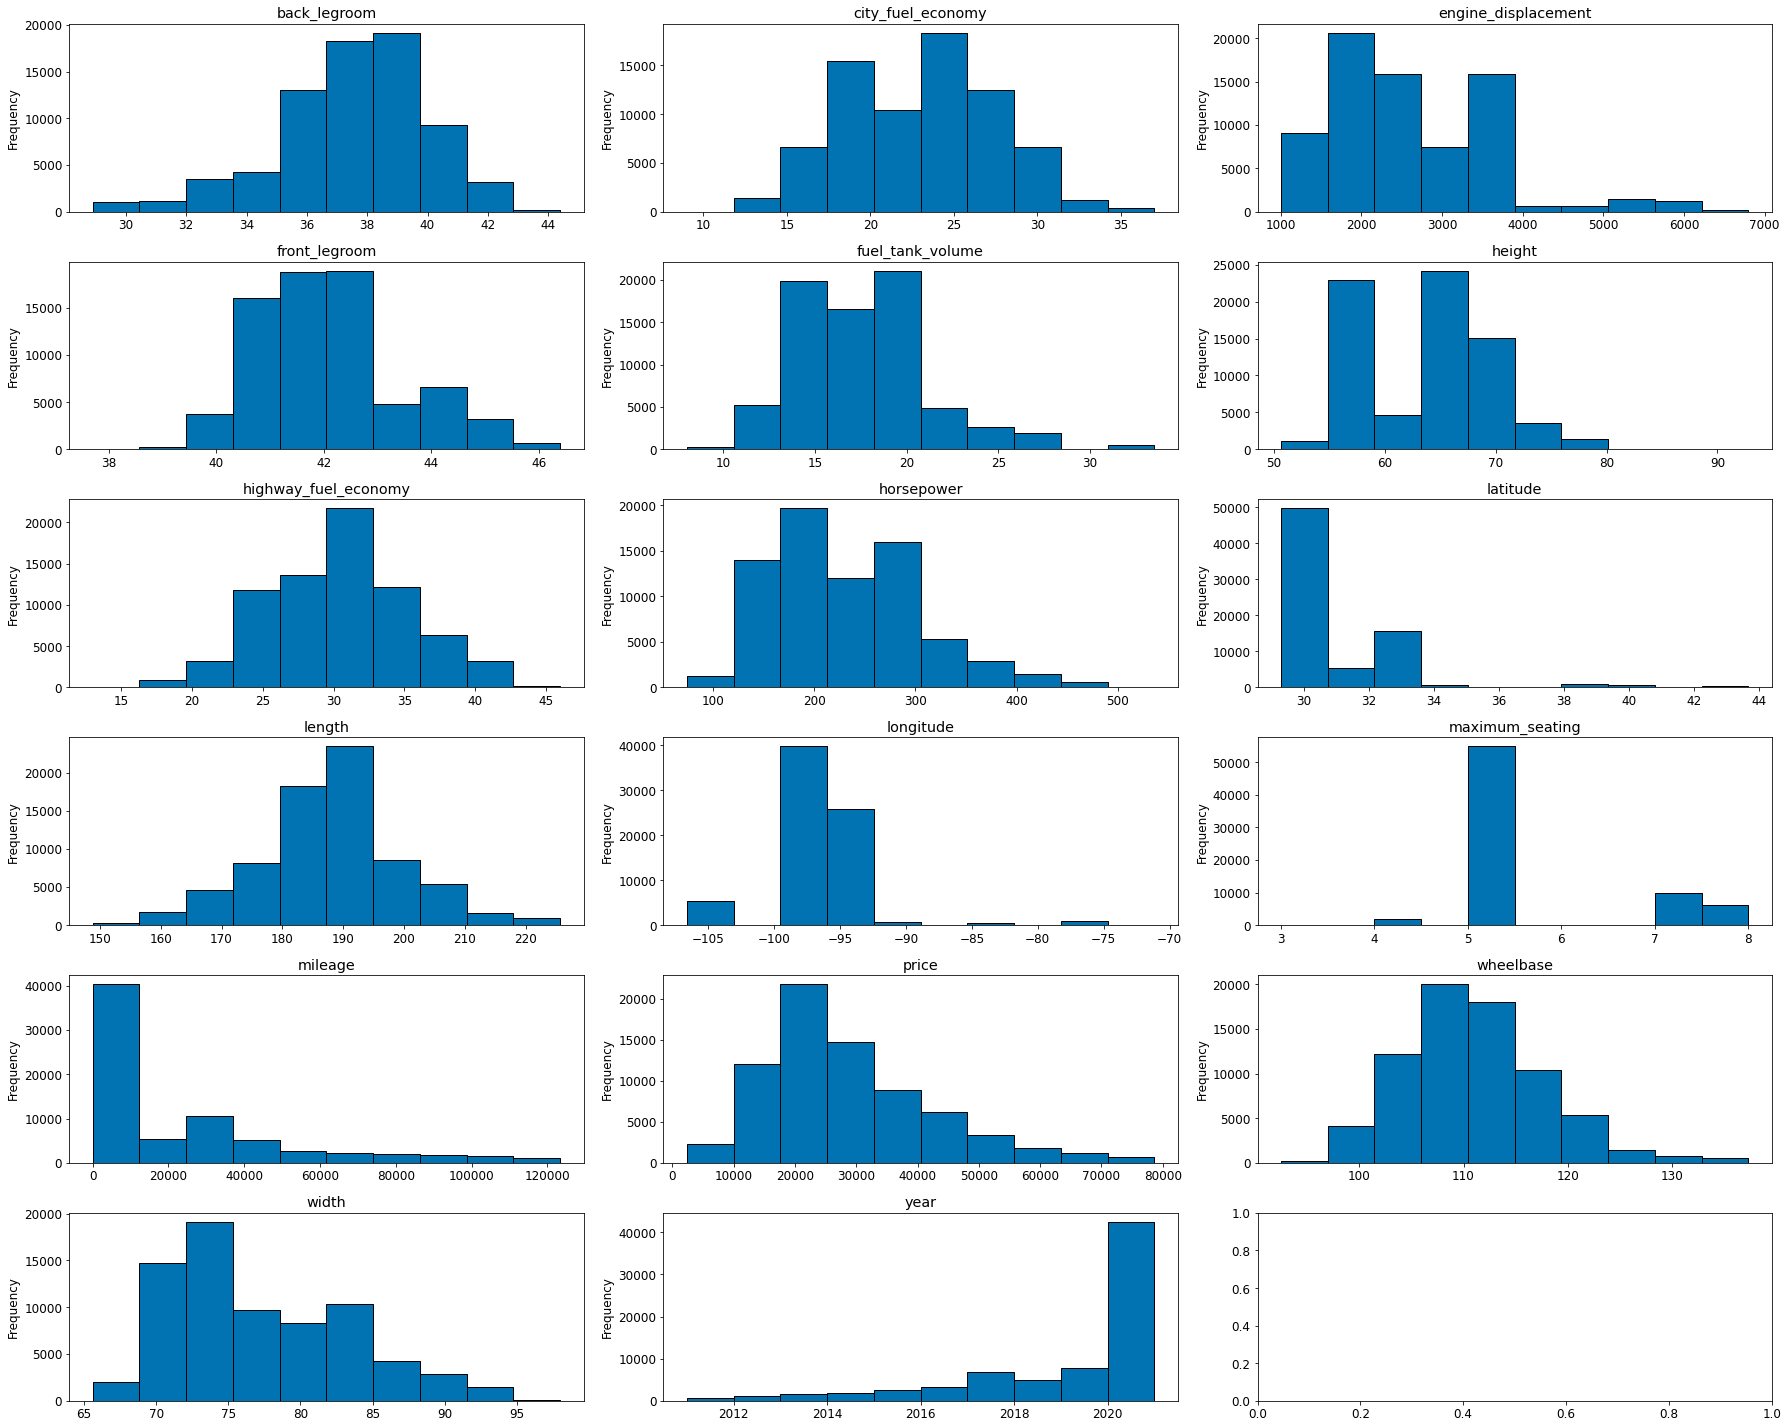

In [15]:
# let's take a quick look at the distributions of the continuous variables
fig, axs = plt.subplots(6, 3, sharey=False, figsize=(25, 20))
axe = axs.ravel()
for i, c in enumerate(num_cols):
    train_exp[c].plot.hist(ax=axe[i],title=c, ec='black')
    plt.tight_layout()

#### Takeaways:
- Some distributions look normal, some not as much
- Will use parametric and non-parametric tests accordingly

### Bivariate

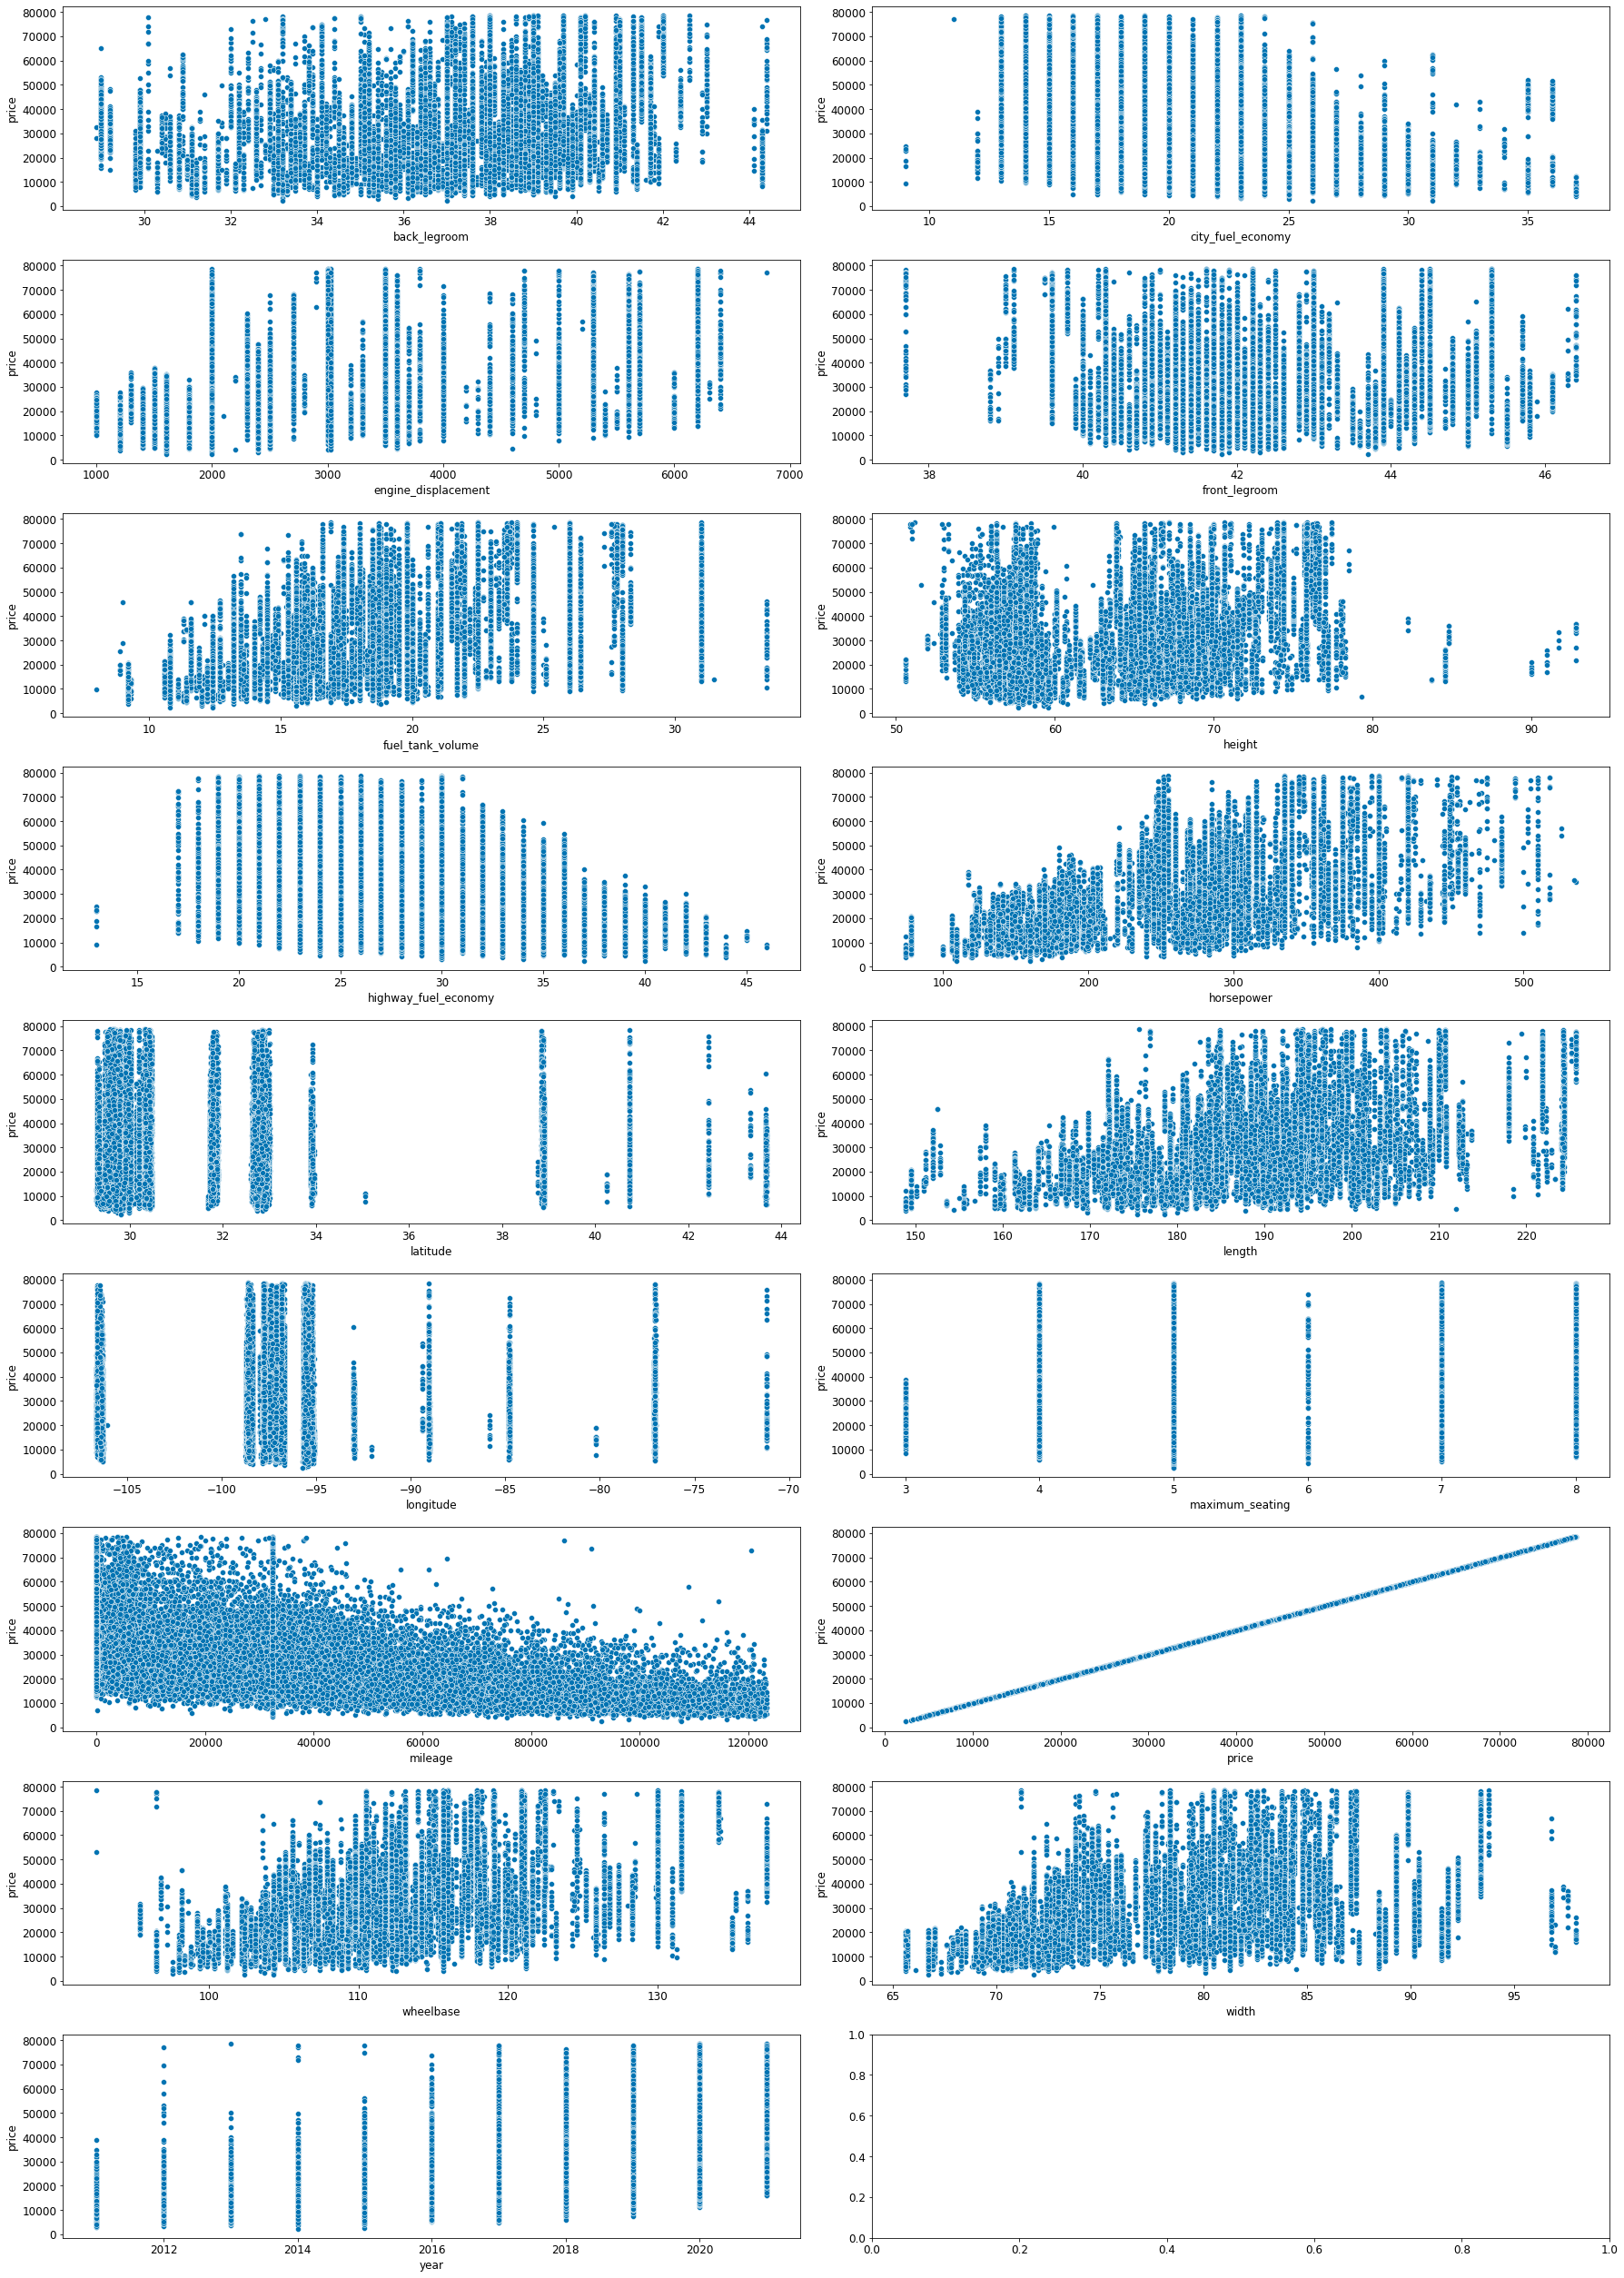

In [16]:
# let's take a look at all other continuous variables compared to target
fig, axs = plt.subplots(9, 2, sharey=False, figsize=(25, 35))
axe = axs.ravel()
for i, c in enumerate(num_cols):
    sns.scatterplot(x=train_exp[c], y=train_exp.price, ax=axe[i])
    plt.tight_layout()

#### Takeaways:
- Positive correlations between price and:
    - back legroom
    - engine displacement
    - fuel tank volume
    - horsepower
    - length
    - maximum seating
    - wheelbase
    - width
    - year
- Negative correlations between price and:
    - city fuel economy
    - highway fuel economy
    - mileage

In [17]:
# # heatmap of correlations for all columns
# plt.figure(figsize=(20, 20))
# heatmap = sns.heatmap(train_exp.corr(method='spearman'), annot=True, cmap='coolwarm_r', vmin=-1, vmax=1, center=0)
# heatmap.set_title('Correlation Heatmap for Predictors and Target', pad=16);

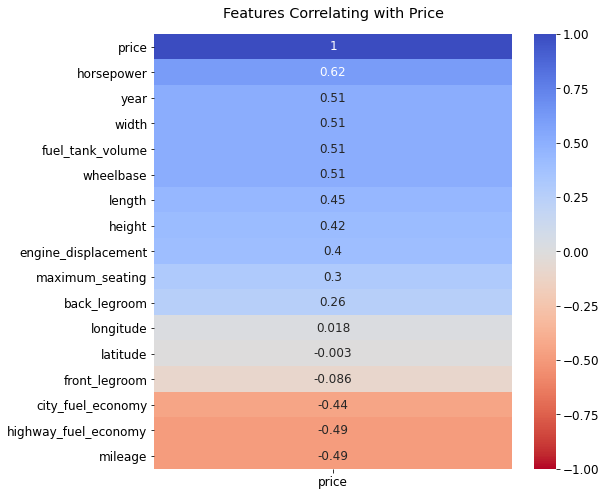

In [18]:
# heatmap of correlations for features and target
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(train_exp[num_cols].corr(method='spearman')[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm_r', vmin=-1, vmax=1 );
heatmap.set_title('Features Correlating with Price', pad=16);

#### Spearman's R Tests

$H_0$: There is no correlation between the each of the continuous variables and price.

$H_a$: There is a correlation between the each of the continuous variables and price.

In [19]:
print(f"Spearman's Correlation Coefficient Test results:\n")
for col in num_cols:
    r, p = stats.spearmanr(train_exp.price, train_exp[col])
    print(f'price vs {col}:\nr = {r:.2f}\np = {p:.3f}\n')
    if p < 0.01:
        print(f'We REJECT the null hypothesis, there is a correlation between {col} and price.\n')
    else:
        print(f'We FAIL TO REJECT the null hypothesis, there is not a correlation between {col} and price.\n')

Spearman's Correlation Coefficient Test results:

price vs back_legroom:
r = 0.26
p = 0.000

We REJECT the null hypothesis, there is a correlation between back_legroom and price.

price vs city_fuel_economy:
r = -0.44
p = 0.000

We REJECT the null hypothesis, there is a correlation between city_fuel_economy and price.

price vs engine_displacement:
r = 0.40
p = 0.000

We REJECT the null hypothesis, there is a correlation between engine_displacement and price.

price vs front_legroom:
r = -0.09
p = 0.000

We REJECT the null hypothesis, there is a correlation between front_legroom and price.

price vs fuel_tank_volume:
r = 0.51
p = 0.000

We REJECT the null hypothesis, there is a correlation between fuel_tank_volume and price.

price vs height:
r = 0.42
p = 0.000

We REJECT the null hypothesis, there is a correlation between height and price.

price vs highway_fuel_economy:
r = -0.49
p = 0.000

We REJECT the null hypothesis, there is a correlation between highway_fuel_economy and price.


#### Takeaways:
- All other continuous variables have a statistically significant correlation with price
- All continuous variables with a correlation coefficient >= 0.2 will be included in model

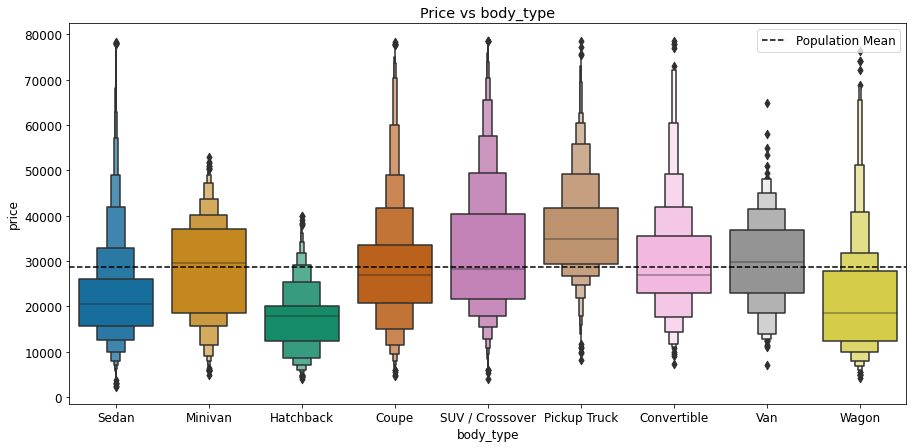

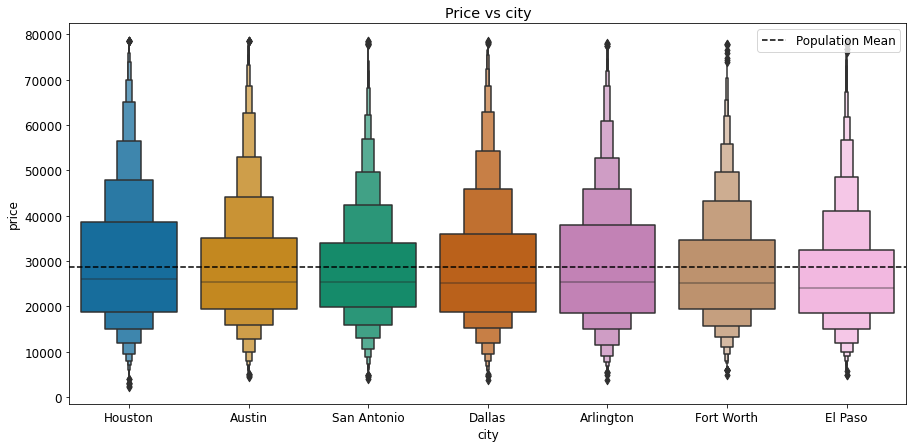

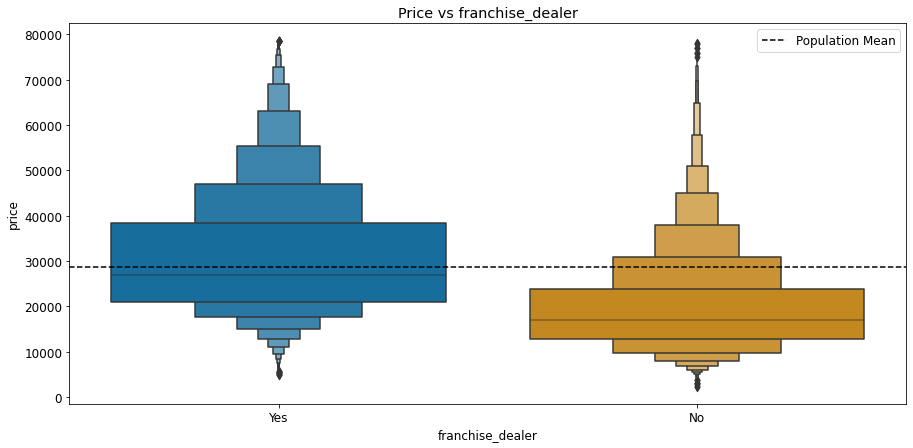

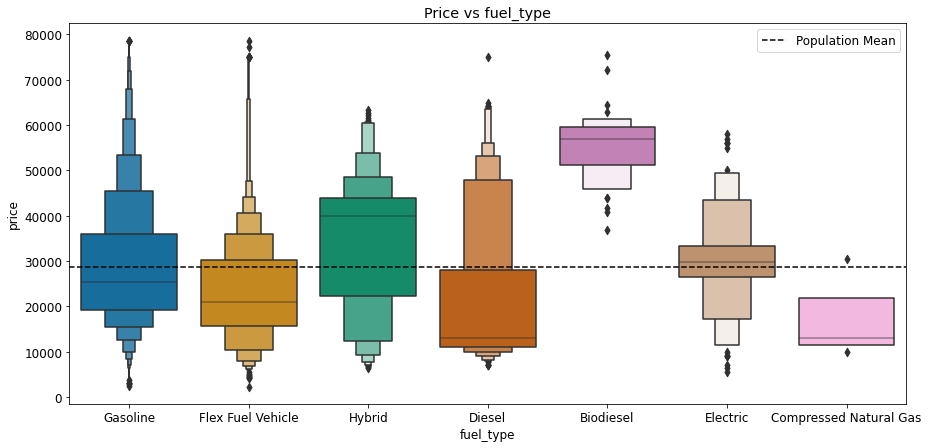

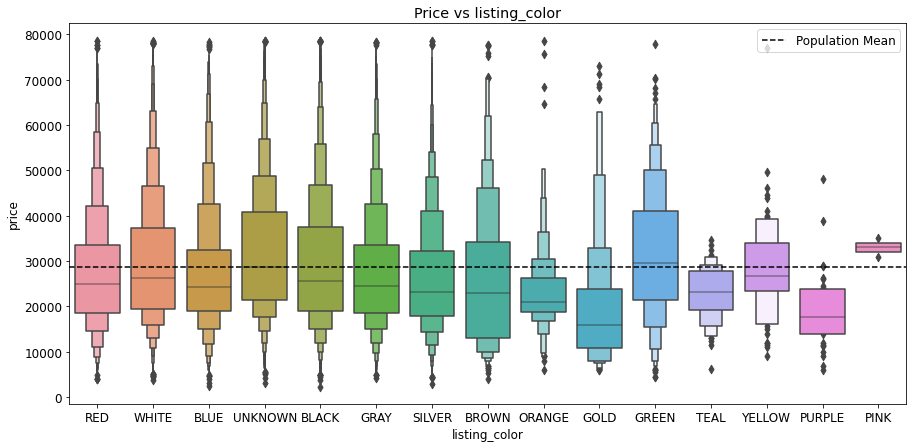

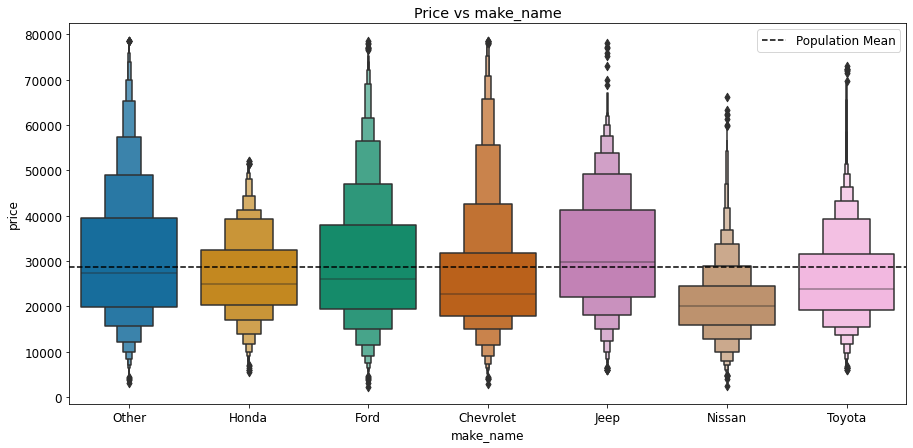

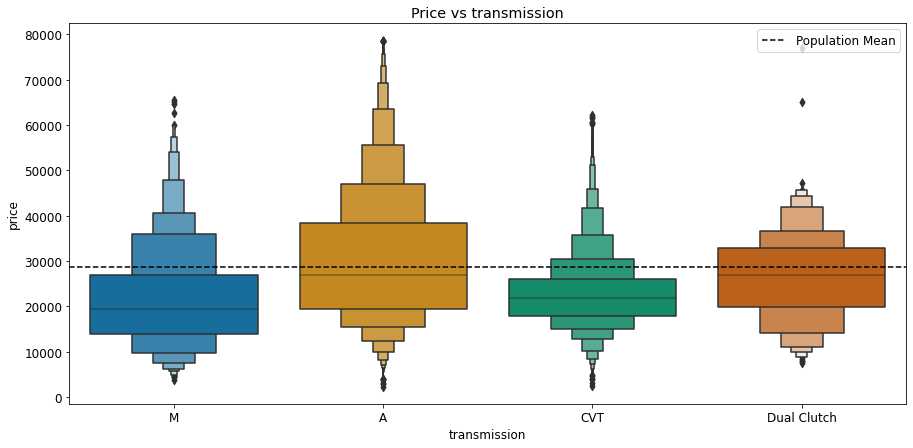

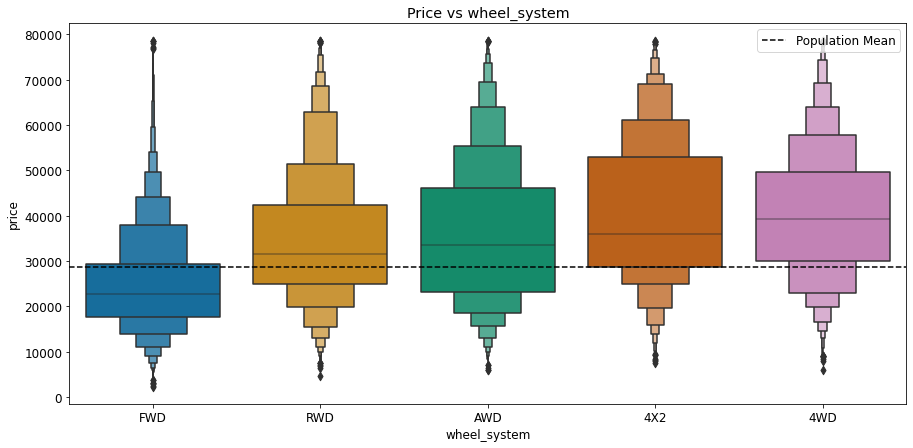

In [20]:
for col in cat_cols:
    sns.boxenplot(x=train_exp[col], y=train_exp.price)
    plt.axhline(train_exp.price.mean(), ls='--', color='black', label='Population Mean')
    plt.title(f'Price vs {col}')
    plt.legend(loc='upper right')
    plt.show()

---
#### Kruskal-Wallis H-Tests

$H_0$: The median price of all of the groups are equal for each categorical variable.

$H_a$: The median price of all of the groups are not equal for each categorical variable.

In [21]:
cat_cols

['body_type',
 'city',
 'franchise_dealer',
 'fuel_type',
 'listing_color',
 'make_name',
 'transmission',
 'wheel_system']

In [22]:
# couldn't get this all the way into a function, wanted to get all category subsets into stat.kruskal arguments
cat = 'body_type'
group_list = []

for group, values in train_exp.groupby(cat):
    group_list.append(group)

H, p = stats.kruskal(
    train_exp.price[train_exp[cat] == group_list[0]],
    train_exp.price[train_exp[cat] == group_list[1]],
    train_exp.price[train_exp[cat] == group_list[2]],
    train_exp.price[train_exp[cat] == group_list[3]],
    train_exp.price[train_exp[cat] == group_list[4]],
    train_exp.price[train_exp[cat] == group_list[5]],
    train_exp.price[train_exp[cat] == group_list[6]],
    train_exp.price[train_exp[cat] == group_list[7]],
    train_exp.price[train_exp[cat] == group_list[8]]
)

print(f"Kruskal-Wallis Test Results:\n")

print(f'price vs {cat}:\n\nH = {H:.2f}\np = {p:.3f}\n')

if p < 0.01:
    print(f'We REJECT the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
else:
    print(f'We FAIL TO REJECT reject the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')

    
cat = 'city'
group_list = []

for group, values in train_exp.groupby(cat):
    group_list.append(group)

H, p = stats.kruskal(
    train_exp.price[train_exp[cat] == group_list[0]],
    train_exp.price[train_exp[cat] == group_list[1]],
    train_exp.price[train_exp[cat] == group_list[2]],
    train_exp.price[train_exp[cat] == group_list[3]],
    train_exp.price[train_exp[cat] == group_list[4]],
    train_exp.price[train_exp[cat] == group_list[5]],
    train_exp.price[train_exp[cat] == group_list[6]],
)

print(f'price vs {cat}:\n\nH = {H:.2f}\np = {p:.3f}\n')

if p < 0.01:
    print(f'We REJECT the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
else:
    print(f'We FAIL TO REJECT reject the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')

    
cat = 'franchise_dealer'
group_list = []

for group, values in train_exp.groupby(cat):
    group_list.append(group)

H, p = stats.kruskal(
    train_exp.price[train_exp[cat] == group_list[0]],
    train_exp.price[train_exp[cat] == group_list[1]]
)

print(f'price vs {cat}:\n\nH = {H:.2f}\np = {p:.3f}\n')

if p < 0.01:
    print(f'We REJECT the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
else:
    print(f'We FAIL TO REJECT reject the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
   

cat = 'fuel_type'
group_list = []

for group, values in train_exp.groupby(cat):
    group_list.append(group)

H, p = stats.kruskal(
    train_exp.price[train_exp[cat] == group_list[0]],
    train_exp.price[train_exp[cat] == group_list[1]],
    train_exp.price[train_exp[cat] == group_list[2]],
    train_exp.price[train_exp[cat] == group_list[3]],
    train_exp.price[train_exp[cat] == group_list[4]],
    train_exp.price[train_exp[cat] == group_list[5]],
    train_exp.price[train_exp[cat] == group_list[6]],
)

print(f'price vs {cat}:\n\nH = {H:.2f}\np = {p:.3f}\n')

if p < 0.01:
    print(f'We REJECT the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
else:
    print(f'We FAIL TO REJECT reject the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
   

cat = 'listing_color'
group_list = []

for group, values in train_exp.groupby(cat):
    group_list.append(group)

H, p = stats.kruskal(
    train_exp.price[train_exp[cat] == group_list[0]],
    train_exp.price[train_exp[cat] == group_list[1]],
    train_exp.price[train_exp[cat] == group_list[2]],
    train_exp.price[train_exp[cat] == group_list[3]],
    train_exp.price[train_exp[cat] == group_list[4]],
    train_exp.price[train_exp[cat] == group_list[5]],
    train_exp.price[train_exp[cat] == group_list[6]],
    train_exp.price[train_exp[cat] == group_list[7]],
    train_exp.price[train_exp[cat] == group_list[8]],
    train_exp.price[train_exp[cat] == group_list[9]],
    train_exp.price[train_exp[cat] == group_list[10]],
    train_exp.price[train_exp[cat] == group_list[11]],
    train_exp.price[train_exp[cat] == group_list[12]],
    train_exp.price[train_exp[cat] == group_list[13]],
    train_exp.price[train_exp[cat] == group_list[14]]
)

print(f'price vs {cat}:\n\nH = {H:.2f}\np = {p:.3f}\n')

if p < 0.01:
    print(f'We REJECT the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
else:
    print(f'We FAIL TO REJECT reject the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
    
    
cat = 'make_name'
group_list = []

for group, values in train_exp.groupby(cat):
    group_list.append(group)

H, p = stats.kruskal(
    train_exp.price[train_exp[cat] == group_list[0]],
    train_exp.price[train_exp[cat] == group_list[1]],
    train_exp.price[train_exp[cat] == group_list[2]],
    train_exp.price[train_exp[cat] == group_list[3]],
    train_exp.price[train_exp[cat] == group_list[4]],
    train_exp.price[train_exp[cat] == group_list[5]],
    train_exp.price[train_exp[cat] == group_list[6]]
)

print(f'price vs {cat}:\n\nH = {H:.2f}\np = {p:.3f}\n')

if p < 0.01:
    print(f'We REJECT the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
else:
    print(f'We FAIL TO REJECT reject the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
    
    
cat = 'transmission'
group_list = []

for group, values in train_exp.groupby(cat):
    group_list.append(group)

H, p = stats.kruskal(
    train_exp.price[train_exp[cat] == group_list[0]],
    train_exp.price[train_exp[cat] == group_list[1]],
    train_exp.price[train_exp[cat] == group_list[2]],
    train_exp.price[train_exp[cat] == group_list[3]]
)

print(f'price vs {cat}:\n\nH = {H:.2f}\np = {p:.3f}\n')

if p < 0.01:
    print(f'We REJECT the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
else:
    print(f'We FAIL TO REJECT reject the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
    
    
cat = 'wheel_system'
group_list = []

for group, values in train_exp.groupby(cat):
    group_list.append(group)

H, p = stats.kruskal(
    train_exp.price[train_exp[cat] == group_list[0]],
    train_exp.price[train_exp[cat] == group_list[1]],
    train_exp.price[train_exp[cat] == group_list[2]],
    train_exp.price[train_exp[cat] == group_list[3]],
    train_exp.price[train_exp[cat] == group_list[4]]
)

print(f'price vs {cat}:\n\nH = {H:.2f}\np = {p:.3f}\n')

if p < 0.01:
    print(f'We REJECT the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')
else:
    print(f'We FAIL TO REJECT reject the null hypothesis, the median price of all of the groups are not equal for {cat}.\n')

Kruskal-Wallis Test Results:

price vs body_type:

H = 12076.97
p = 0.000

We REJECT the null hypothesis, the median price of all of the groups are not equal for body_type.

price vs city:

H = 147.33
p = 0.000

We REJECT the null hypothesis, the median price of all of the groups are not equal for city.

price vs franchise_dealer:

H = 9189.79
p = 0.000

We REJECT the null hypothesis, the median price of all of the groups are not equal for franchise_dealer.

price vs fuel_type:

H = 707.95
p = 0.000

We REJECT the null hypothesis, the median price of all of the groups are not equal for fuel_type.

price vs listing_color:

H = 1473.10
p = 0.000

We REJECT the null hypothesis, the median price of all of the groups are not equal for listing_color.

price vs make_name:

H = 3885.67
p = 0.000

We REJECT the null hypothesis, the median price of all of the groups are not equal for make_name.

price vs transmission:

H = 2754.56
p = 0.000

We REJECT the null hypothesis, the median price of all

#### Takeaways:
- All of these categorical features have a relationship with price, we will investigate further to see which categories specifically have a different mean price than the population

---
#### One-Sample T-Tests

In [23]:
print(f'~~~~~~~~~~~~~~~~~~~~~~~~~~~\nOne-sample T-Test Results\n~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')
for col in cat_cols:
    print(f'===================\n{col}\n===================\n')
    ex.group_stats(train_exp, 'price', col)

~~~~~~~~~~~~~~~~~~~~~~~~~~~
One-sample T-Test Results
~~~~~~~~~~~~~~~~~~~~~~~~~~~

body_type

----------------
Convertible
----------------
T-Statistic: 1.58
P-value: 0.116
We FAIL TO REJECT the null hypothesis, the mean price for the Convertible subset is not different than the overall population mean.

----------------
Coupe
----------------
T-Statistic: -0.87
P-value: 0.383
We FAIL TO REJECT the null hypothesis, the mean price for the Coupe subset is not different than the overall population mean.

----------------
Hatchback
----------------
T-Statistic: -68.52
P-value: 0.000
We REJECT the null hypothesis, the mean price for the Hatchback subset is different than the overall population mean.

----------------
Minivan
----------------
T-Statistic: -1.14
P-value: 0.254
We FAIL TO REJECT the null hypothesis, the mean price for the Minivan subset is not different than the overall population mean.

----------------
Pickup Truck
----------------
T-Statistic: 42.82
P-value: 0.000
We REJECT

#### Takeaways:
- All categories where we were able to reject the null hypothesis are related to price and will be further investigated to see if they should be used in modeling

---
### X and y (keeping everything for feature analysis)

In [24]:
# split into X and y for all splits
X_train = train_mod_scaled.drop(columns='price')
y_train = train_mod_scaled.price
X_validate = val_mod_scaled.drop(columns='price')
y_validate = val_mod_scaled.price
X_test = test_mod_scaled.drop(columns='price')
y_test = test_mod_scaled.price

---
### Additional Feature Analysis

In [25]:
len(num_cols)

17

#### SelectKBest

In [26]:
ex.select_kbest(X_train, y_train, 15)

['franchise_dealer_No',
 'franchise_dealer_Yes',
 'wheel_system_FWD',
 'city_fuel_economy_scaled',
 'engine_displacement_scaled',
 'fuel_tank_volume_scaled',
 'height_scaled',
 'highway_fuel_economy_scaled',
 'horsepower_scaled',
 'length_scaled',
 'maximum_seating_scaled',
 'mileage_scaled',
 'wheelbase_scaled',
 'width_scaled',
 'year_scaled']

##### Takeway:
- Most of top features here are numerical variables

#### RFE

In [27]:
ex.show_rfe_feature_ranking(X_train, y_train).head(15)

transmission_A               1
transmission_Dual Clutch     2
transmission_CVT             3
transmission_M               4
wheel_system_FWD             5
wheel_system_RWD             6
wheel_system_AWD             7
wheel_system_4WD             8
wheel_system_4X2             9
make_name_Honda             10
make_name_Other             11
make_name_Ford              12
make_name_Toyota            13
make_name_Jeep              14
make_name_Chevrolet         15
dtype: int64

##### Takeway:
- Categorical variables are being ranked higher with this method

### Explore Takeaways:
- All continuous variables will and a few of the top categorical variables (highest tests statistics) will further investigated via modeling


---
## Model/Evaluate
---

In [28]:
target = 'price'

### X and y

In [29]:
cols_to_scale

['back_legroom',
 'city_fuel_economy',
 'engine_displacement',
 'front_legroom',
 'fuel_tank_volume',
 'height',
 'highway_fuel_economy',
 'horsepower',
 'latitude',
 'length',
 'longitude',
 'maximum_seating',
 'mileage',
 'wheelbase',
 'width',
 'year']

In [30]:
cols_to_scale.remove('latitude')
cols_to_scale.remove('longitude')
cols_to_scale.remove('front_legroom')
cols_to_scale

['back_legroom',
 'city_fuel_economy',
 'engine_displacement',
 'fuel_tank_volume',
 'height',
 'highway_fuel_economy',
 'horsepower',
 'length',
 'maximum_seating',
 'mileage',
 'wheelbase',
 'width',
 'year']

In [31]:
features_for_model = [col + '_scaled' for col in cols_to_scale]

In [32]:
features_for_model

['back_legroom_scaled',
 'city_fuel_economy_scaled',
 'engine_displacement_scaled',
 'fuel_tank_volume_scaled',
 'height_scaled',
 'highway_fuel_economy_scaled',
 'horsepower_scaled',
 'length_scaled',
 'maximum_seating_scaled',
 'mileage_scaled',
 'wheelbase_scaled',
 'width_scaled',
 'year_scaled']

In [33]:
len(features_for_model)

13

In [34]:
# split into X and y for all splits
X_train = train_mod_scaled[features_for_model]
y_train = train_mod_scaled[target]
X_validate = val_mod_scaled[features_for_model]
y_validate = val_mod_scaled[target]
X_test = test_mod_scaled[features_for_model]
y_test = test_mod_scaled[target]

### Target Distribution

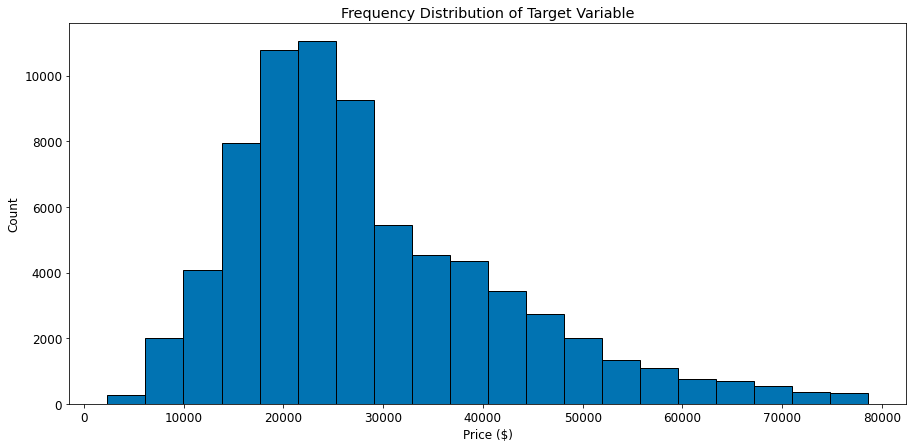

In [35]:
plt.hist(y_train, edgecolor='black', bins=20)
plt.title('Frequency Distribution of Target Variable')
plt.xlabel('Price ($)')
plt.ylabel('Count');

***Not completely normal, this could inform our model algorithm selection decision***

### Baseline

In [36]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# Predict baseline_mean
baseline_mean = y_train[target].mean()
y_train['baseline_mean'] = baseline_mean
y_validate['baseline_mean'] = baseline_mean

# Predict baseline_median
baseline_median = y_train[target].median()
y_train['baseline_median'] = baseline_median
y_validate['baseline_median'] = baseline_median

In [37]:
# create empty df to start appending to
metric_df = pd.DataFrame()

In [38]:
# get metrics for baseline mean model
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.baseline_mean, 
                           y_validate[target], 
                           y_validate.baseline_mean, 
                           'Baseline Mean', 
                           metric_df)

In [39]:
# get metrics for baseline median model
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.baseline_median, 
                           y_validate[target], 
                           y_validate.baseline_median, 
                           'Baseline Median', 
                           metric_df)

### LinearRegression (OLS)

In [40]:
# make model
ols = LinearRegression(normalize=True)

# fit model
ols.fit(X_train, y_train[target])

# Make prediction for train and validate
y_train['ols_y_pred'] = ols.predict(X_train)
y_validate['ols_y_pred'] = ols.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.ols_y_pred, 
                           y_validate[target], 
                           y_validate.ols_y_pred, 
                           'OLS', 
                           metric_df)

### LassoLars

In [41]:
# create the model
lars = LassoLars(alpha=0.1)

# fit the model
lars.fit(X_train, y_train[target])

# predict train
y_train['lars_y_pred_alpha_01'] = lars.predict(X_train)

# predict validate
y_validate['lars_y_pred_alpha_01'] = lars.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.lars_y_pred_alpha_01, 
                           y_validate[target], 
                           y_validate.lars_y_pred_alpha_01, 
                           'LassoLars Alpha 0.1', 
                           metric_df)

In [42]:
# create the model
lars = LassoLars(alpha=0.5)

# fit the model
lars.fit(X_train, y_train[target])

# predict train
y_train['lars_y_pred_alpha_05'] = lars.predict(X_train)

# predict validate
y_validate['lars_y_pred_alpha_05'] = lars.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.lars_y_pred_alpha_05, 
                           y_validate[target], 
                           y_validate.lars_y_pred_alpha_05, 
                           'LassoLars Alpha 0.5', 
                           metric_df)

In [43]:
# create the model
lars = LassoLars(alpha=1)

# fit the model
lars.fit(X_train, y_train[target])

# predict train
y_train['lars_y_pred_alpha_1'] = lars.predict(X_train)

# predict validate
y_validate['lars_y_pred_alpha_1'] = lars.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.lars_y_pred_alpha_1, 
                           y_validate[target], 
                           y_validate.lars_y_pred_alpha_1, 
                           'LassoLars Alpha 1', 
                           metric_df)

###  TweedieRegressor (GLM)

In [44]:
# create the model
glm = TweedieRegressor(power=0, alpha=0)

# fit the model
glm.fit(X_train, y_train[target])

# predict train
y_train['glm_y_pred_normal'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_normal'] = glm.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.glm_y_pred_normal, 
                           y_validate[target], 
                           y_validate.glm_y_pred_normal, 
                           'GLM Normal', 
                           metric_df)

In [45]:
# create the model
glm = TweedieRegressor(power=1, alpha=0)

# fit the model
glm.fit(X_train, y_train[target])

# predict train
y_train['glm_y_pred_poisson'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_poisson'] = glm.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.glm_y_pred_poisson, 
                           y_validate[target], 
                           y_validate.glm_y_pred_poisson, 
                           'GLM Poisson', 
                           metric_df)

In [46]:
# create the model
glm = TweedieRegressor(power=1.5, alpha=0)

# fit the model
glm.fit(X_train, y_train[target])

# predict train
y_train['glm_y_pred_poisson_gamma'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_poisson_gamma'] = glm.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.glm_y_pred_poisson_gamma, 
                           y_validate[target], 
                           y_validate.glm_y_pred_poisson_gamma, 
                           'GLM Poisson Gamma', 
                           metric_df)

In [47]:
# create the model
glm = TweedieRegressor(power=2, alpha=0)

# fit the model
glm.fit(X_train, y_train[target])

# predict train
y_train['glm_y_pred_gamma'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_gamma'] = glm.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.glm_y_pred_gamma, 
                           y_validate[target], 
                           y_validate.glm_y_pred_gamma, 
                           'GLM Gamma', 
                           metric_df)

In [48]:
# create the model
glm = TweedieRegressor(power=3, alpha=0)

# fit the model
glm.fit(X_train, y_train[target])

# predict train
y_train['glm_y_pred_i_gauss'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_i_gauss'] = glm.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.glm_y_pred_i_gauss, 
                           y_validate[target], 
                           y_validate.glm_y_pred_i_gauss, 
                           'GLM Inverse Gaussian', 
                           metric_df)

### Polynomial Regression

#### PolynomialFeatures

In [49]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate
X_validate_degree2 = pf.transform(X_validate)

In [50]:
# make the polynomial features to get a new set of features
pf3 = PolynomialFeatures(degree=3)

# fit and transform X_train
X_train_degree3 = pf3.fit_transform(X_train)

# transform X_validate
X_validate_degree3 = pf3.transform(X_validate)

In [51]:
# make the polynomial features to get a new set of features
pf4 = PolynomialFeatures(degree=4)

# fit and transform X_train
X_train_degree4 = pf4.fit_transform(X_train)

# transform X_validate
X_validate_degree4 = pf4.transform(X_validate)

#### LinearRegression

In [52]:
%%time
# create the model
lm2 = LinearRegression(normalize=True)

# fit the model
lm2.fit(X_train_degree2, y_train[target])

# predict train
y_train['lm2_y_pred'] = lm2.predict(X_train_degree2)

# predict validate
y_validate['lm2_y_pred'] = lm2.predict(X_validate_degree2)

# get metrics
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.lm2_y_pred, 
                           y_validate[target], 
                           y_validate.lm2_y_pred, 
                           'Polynomial Regression Degree 2', 
                           metric_df)

CPU times: user 657 ms, sys: 41.2 ms, total: 699 ms
Wall time: 330 ms


In [53]:
%%time
# create the model
lm3 = LinearRegression(normalize=True)

# fit the model
lm3.fit(X_train_degree3, y_train[target])

# predict train
y_train['lm3_y_pred'] = lm3.predict(X_train_degree3)

# predict validate
y_validate['lm3_y_pred'] = lm3.predict(X_validate_degree3)

# get metrics
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.lm3_y_pred, 
                           y_validate[target], 
                           y_validate.lm3_y_pred, 
                           'Polynomial Regression Degree 3', 
                           metric_df)

CPU times: user 7.47 s, sys: 547 ms, total: 8.01 s
Wall time: 3.8 s


In [54]:
%%time
# create the model
lm4 = LinearRegression(normalize=True)

# fit the model
lm4.fit(X_train_degree4, y_train[target])

# predict train
y_train['lm4_y_pred'] = lm4.predict(X_train_degree4)

# predict validate
y_validate['lm4_y_pred'] = lm4.predict(X_validate_degree4)

# get metrics
metric_df = ev.make_metric_df(y_train[target], 
                           y_train.lm4_y_pred, 
                           y_validate[target], 
                           y_validate.lm4_y_pred, 
                           'Polynomial Regression Degree 4', 
                           metric_df)

CPU times: user 59.6 s, sys: 5.22 s, total: 1min 4s
Wall time: 26.5 s


In [55]:
# Take a look at final metric df
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,Baseline Mean,13617.83,13544.59,73.24,0.00,0.00,0.00
1,Baseline Median,13991.70,13931.13,60.56,0.00,0.00,0.00
2,OLS,7495.36,7414.48,80.88,0.70,0.70,-0.00
3,LassoLars Alpha 0.1,7499.37,7415.31,84.06,0.70,0.70,-0.00
4,LassoLars Alpha 0.5,7563.52,7473.47,90.06,0.69,0.70,-0.00
5,LassoLars Alpha 1,7694.06,7602.24,91.81,0.68,0.69,-0.00
6,GLM Normal,7495.36,7414.48,80.88,0.70,0.70,-0.00
7,GLM Poisson,7103.92,7092.06,11.86,0.73,0.73,0.00
8,GLM Poisson Gamma,7135.54,7121.48,14.06,0.73,0.72,0.00
9,GLM Gamma,7176.58,7159.89,16.68,0.72,0.72,0.00


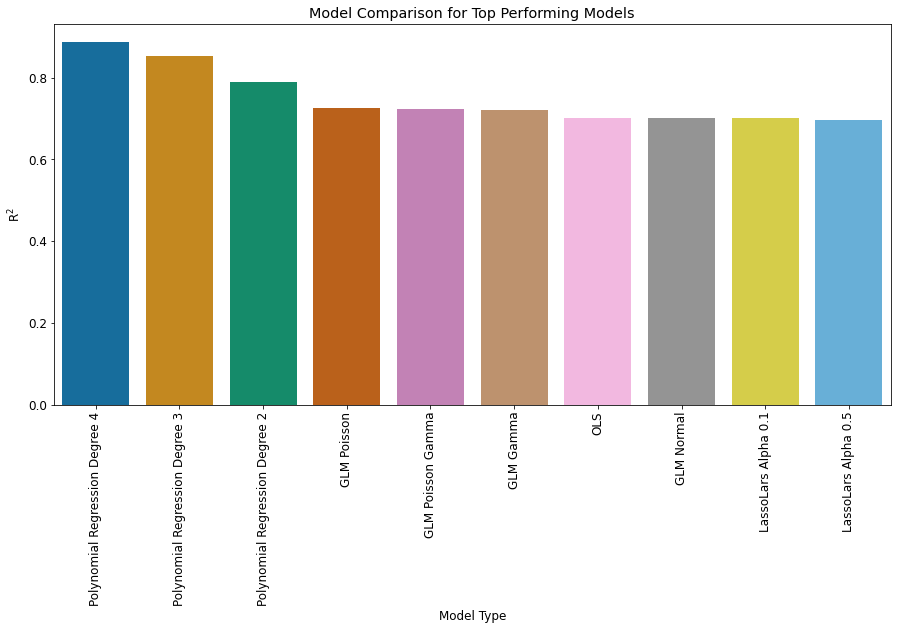

In [56]:
# Make a plot to visualize results
sns.barplot(y=metric_df.sort_values(by='R2_validate', ascending=False).head(10)['R2_validate'], x=metric_df.sort_values(by='R2_validate', ascending=False).head(10)['model'])
plt.title('Model Comparison for Top Performing Models')
# plt.yticks(ticks=np.arange(0,1.1,0.1))
plt.ylabel('R$^2$')
plt.xlabel('Model Type')
plt.xticks(rotation=90);

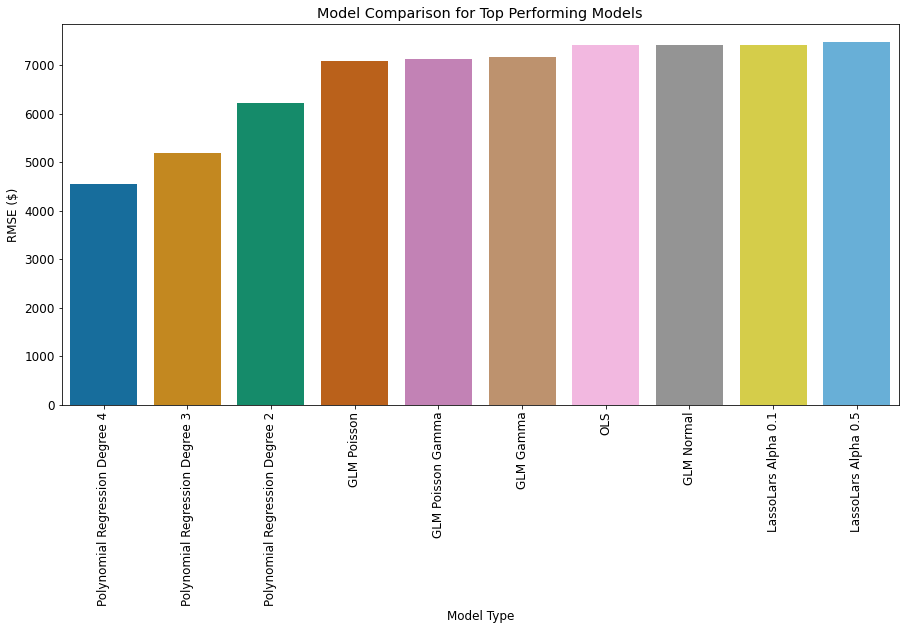

In [57]:
# Make a plot to visualize results
sns.barplot(y=metric_df.sort_values(by='RMSE_validate').head(10)['RMSE_validate'], x=metric_df.sort_values(by='RMSE_validate').head(10)['model'])
plt.title('Model Comparison for Top Performing Models')
plt.ylabel('RMSE ($)')
plt.xlabel('Model Type')
plt.xticks(rotation=90)
plt.show()

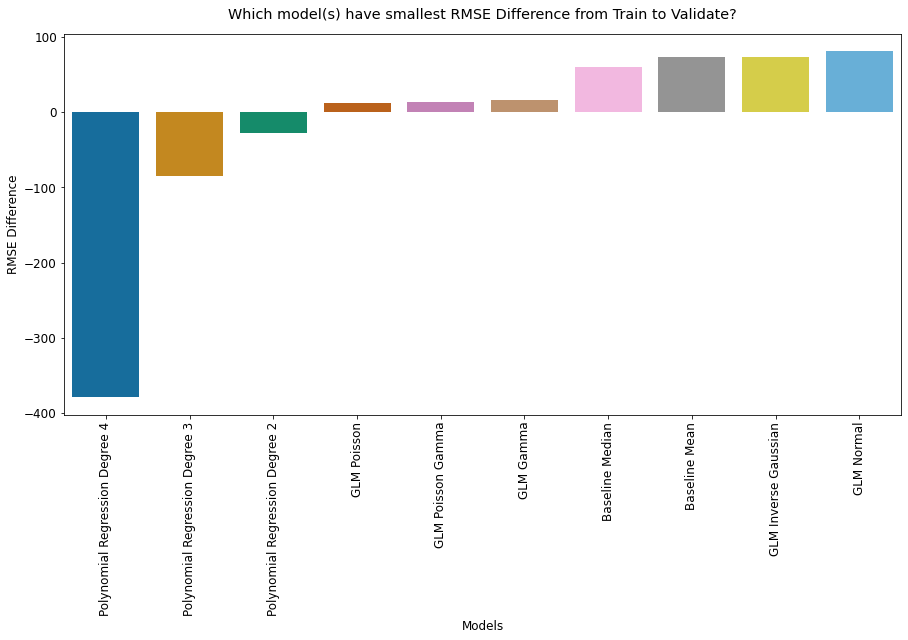

In [58]:
# Make a plot to visualize results
sns.barplot(y=metric_df.sort_values('RMSE_diff').head(10)['RMSE_diff'], x=metric_df.sort_values('RMSE_diff').head(10)['model'])
plt.title('Which model(s) have smallest RMSE Difference from Train to Validate?', pad=16)
plt.xlabel('Models')
plt.ylabel('RMSE Difference')
plt.xticks(rotation=90);

#### Takeaway:
- Best peforming model Polynomial Regression with Degree 4

### Residual Plots

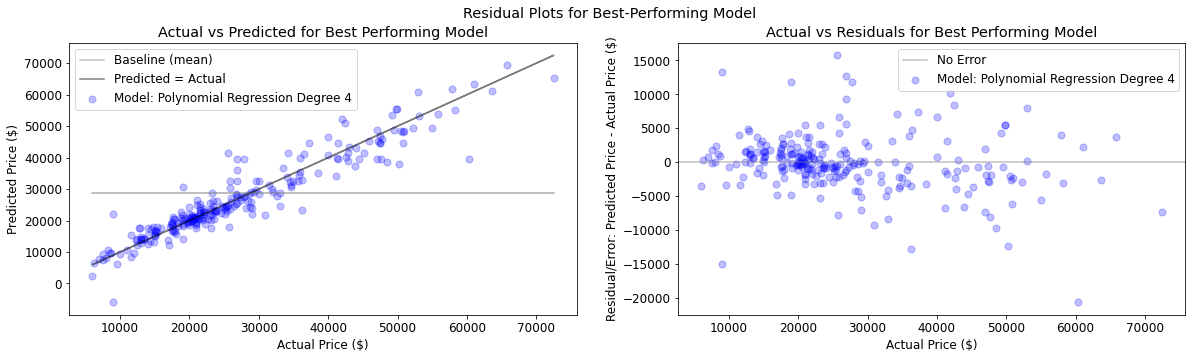

In [59]:
# create residual plots
plt.figure(figsize=(20,5)).suptitle('Residual Plots for Best-Performing Model')

plt.subplot(121)

plt.plot(y_validate[target].sample(n=250, random_state=527), y_validate.baseline_mean.sample(n=250, random_state=527), alpha=0.5, color="gray", label='Baseline (mean)')
plt.plot(y_validate[target].sample(n=250, random_state=527), y_validate[target].sample(n=250, random_state=527), alpha=0.5, color="black", label='Predicted = Actual')

plt.scatter(y_validate[target].sample(n=250, random_state=527), y_validate.lm4_y_pred.sample(n=250, random_state=527), 
            alpha=.25, color="blue", s=50, label="Model: Polynomial Regression Degree 4")

plt.legend()
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs Predicted for Best Performing Model")

plt.subplot(122)

plt.axhline(label="No Error", color='gray', alpha=0.5)
plt.scatter(y_validate[target].sample(n=250, random_state=527), (y_validate.lm4_y_pred - y_validate[target]).sample(n=250, random_state=527), 
            alpha=.25, color="blue", s=50, label="Model: Polynomial Regression Degree 4")

plt.legend()
plt.xlabel("Actual Price ($)")
plt.ylabel("Residual/Error: Predicted Price - Actual Price ($)")
plt.title("Actual vs Residuals for Best Performing Model");

### Actual vs Predicted Distributions

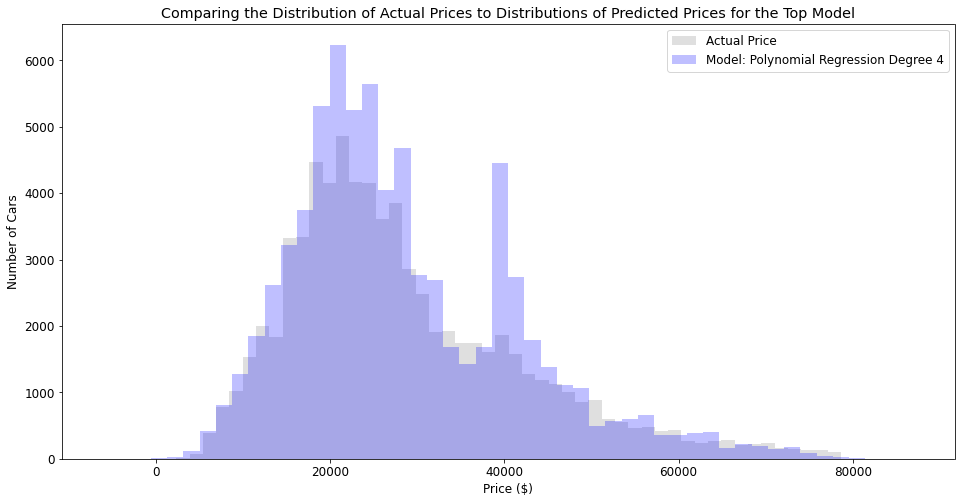

In [60]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_train[target], color='gray', alpha=.25, label="Actual Price", bins=50)
plt.hist(y_train.lm4_y_pred, color='blue', alpha=.25, label="Model: Polynomial Regression Degree 4", bins=50)
plt.xlabel("Price ($)")
plt.ylabel("Number of Cars")
plt.title("Comparing the Distribution of Actual Prices to Distributions of Predicted Prices for the Top Model")
plt.legend()
plt.show()

### Evaluate Best-Performing Model on Test

In [61]:
y_test = pd.DataFrame(y_test)
y_test['baseline_mean'] = y_train[target].mean()

X_test_degree4 = pf4.fit_transform(X_test)

# predict on test
y_test['lm4_y_pred'] = lm4.predict(X_test_degree4)

# evaluate: rmse
rmse_test = mean_squared_error(y_test[target], y_test.lm4_y_pred, squared=False)
r2_test = explained_variance_score(y_test[target], y_test.lm4_y_pred)
rmse_baseline = mean_squared_error(y_test[target], y_test.baseline_mean, squared=False)
r2_baseline = explained_variance_score(y_test[target], y_test.baseline_mean)

print(f'RMSE for Polynomial Regression Degree 4\nOut-of-Sample Performance: {rmse_test:.2f}\nR^2: {r2_test:.2f}')

RMSE for Polynomial Regression Degree 4
Out-of-Sample Performance: 4994.56
R^2: 0.87


**Compare to Baseline:**

In [62]:
print(f'Metrics for baseline:\nRMSE: {rmse_baseline:.3f}\nR^2: {r2_baseline:.3f}\n')

print(f'Model outperformed best baseline:\nRMSE difference: {rmse_test - rmse_baseline:.2f}\nR^2 difference: \
{(r2_test - r2_baseline):.2f}')

Metrics for baseline:
RMSE: 13708.110
R^2: -0.000

Model outperformed best baseline:
RMSE difference: -8713.55
R^2 difference: 0.87


## Conclusions and Next Steps

**Conclusions/Takaways:**
- The best drivers identified were:
    - `back_legroom`
    - `city_fuel_economy`
    - `engine_displacement`
    - `fuel_tank_volume`
    - `height`
    - `highway_fuel_economy`
    - `horsepower`
    - `length`
    - `maximum_seating`
    - `mileage`
    - `wheelbase`
    - `width`
    - `year`
- Best-peforming model outperformed basline by:
    - Having an RMSE value that was \$8,713.55 less
    - R$^2$ improvement over baseline from 0 to 0.87

**Next Steps/Recommendations:**
- Try more combinations of categorical features to see if I can optimize performance
- Do more nuanced imputation using means/modes of subgroups instead of just means/modes of whole population
- Try less imputation and see how that affects model performance (drop more nulls)